In [2]:
import json
import matplotlib.pyplot as plt

In [3]:
with open("../data/loss_log.json", "r") as f:
    json_data = json.load(f)
json_data

{'proposed': [{'Epoch': 1,
   'loss': 0.3238011354911648,
   'test_loss': {'train-size=10': 0.27777547785576356,
    'train-size=20': 0.27974396896489123,
    'train-size=30': 0.276082159832437,
    'train-size=40': 0.2753493774761545,
    'train-size=50': 0.2808990151958263}},
  {'Epoch': 2,
   'loss': 0.2333262215757418,
   'test_loss': {'train-size=10': 0.2462866280941253,
    'train-size=20': 0.2440547524614537,
    'train-size=30': 0.2364516150444112,
    'train-size=40': 0.23322004793172188,
    'train-size=50': 0.23644216786673727}},
  {'Epoch': 3,
   'loss': 0.1920944363092369,
   'test_loss': {'train-size=10': 0.20723262556055758,
    'train-size=20': 0.19679743003972033,
    'train-size=30': 0.18605093879902618,
    'train-size=40': 0.18136618413189623,
    'train-size=50': 0.18096769188946865}},
  {'Epoch': 4,
   'loss': 0.15490680317581074,
   'test_loss': {'train-size=10': 0.1741092825665119,
    'train-size=20': 0.16038201781029396,
    'train-size=30': 0.1482567675411701

In [21]:
models = ["proposed", "doc2vec"]
train_loss_names = {"loss": "train-loss"}
test_loss_names = {
    "train-size=10": "test-loss (train-size=10)",
    "train-size=20": "test-loss (train-size=20)",
    "train-size=30": "test-loss (train-size=30)",
    "train-size=40": "test-loss (train-size=40)",
    "train-size=50": "test-loss (train-size=50)",
}

loss_data = {}

for model in models:
    loss_data[model] = {}
    for epoch_data in json_data[model]:
        for loss_name, display_loss_name in train_loss_names.items():
            display_loss_name = model + " " + display_loss_name
            if display_loss_name not in loss_data[model]:
                loss_data[model][display_loss_name] = []
            loss_data[model][display_loss_name].append(epoch_data[loss_name])
        for loss_name, display_loss_name in test_loss_names.items():
            display_loss_name = model + " " + display_loss_name
            if display_loss_name not in loss_data[model]:
                loss_data[model][display_loss_name] = []
            loss_data[model][display_loss_name].append(epoch_data["test_loss"][loss_name])

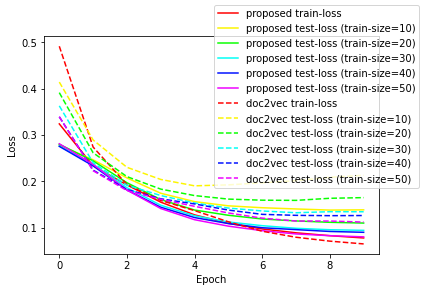

In [22]:
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=(6, 4))

for model in models:
    linestyle = "solid" if model == "proposed" else "dashed"
    for i, (loss_name, losses) in enumerate(loss_data[model].items()):
        ax.plot(losses[:10], label=loss_name, linestyle=linestyle, color=cm.hsv(i / len(loss_data[model])))

ax.set_ylabel("Loss")
ax.set_xlabel("Epoch")
fig.legend()

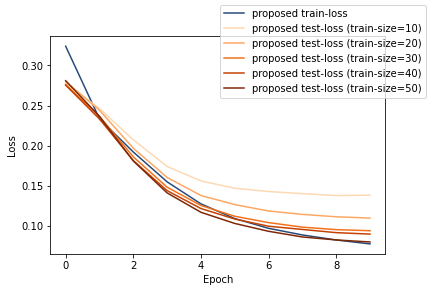

In [26]:
fig, ax = plt.subplots(figsize=(6, 4))

for model in ["proposed"]:
    for i, (loss_name, losses) in enumerate(loss_data[model].items()):
        if loss_name == "proposed train-loss":
            color = "#274A78"
        else:
            color = cm.Oranges(i / 5)
        ax.plot(losses[:10], label=loss_name, color=color)

ax.set_ylabel("Loss")
ax.set_xlabel("Epoch")
fig.legend()
fig.savefig("data/loss.svg", format="svg")

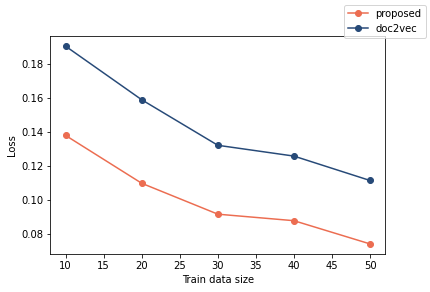

In [27]:
fig, ax = plt.subplots()

colors = {
    "proposed": "#EC6D51",
    "doc2vec": "#274A78"
}

for model in models:
    i = -1
    xs, ys = [], []
    for loss_name, losses in loss_data[model].items():
        i += 1
        if i == 0:
            continue
        xs.append(i * 10)
        ys.append(min(losses))
    ax.plot(xs, ys, marker='o', label=model, color=colors[model])

ax.set_ylabel("Loss")
ax.set_xlabel("Train data size")
fig.legend()
fig.savefig("data/compare.svg", format="svg")

In [25]:
proposed = [0.13780289706080517, 0.10975917064129039, 0.09165382198989391, 0.08783298873520912, 0.07421393228813689]
doc2vec = [0.19013651333590773, 0.15874055341044638, 0.1320475473048839, 0.12571821234961775, 0.11140885534993511]

for i in range(5):
    print(proposed[i] - doc2vec[i])

-0.05233361627510255
-0.04898138276915599
-0.04039372531499
-0.03788522361440863
-0.037194923061798224
